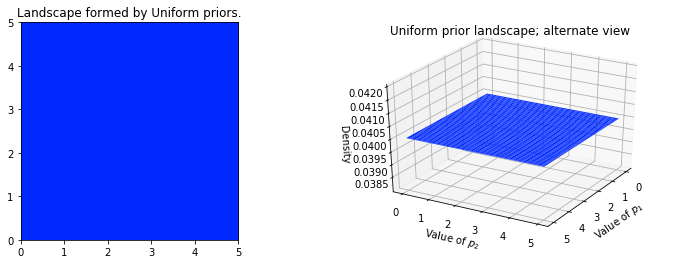

In [19]:
%matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
figsize(12.5, 4)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

jet = plt.cm.jet
fig = plt.figure()
x = y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)

plt.subplot(121)
uni_x = stats.uniform.pdf(x, loc=0, scale=5)
uni_y = stats.uniform.pdf(y, loc=0, scale=5)
M = np.dot(uni_y[:, None], uni_x[None, :])
im = plt.imshow(M, interpolation='none', origin='lower',
                cmap=jet, vmax=1, vmin=-.15, extent=(0, 5, 0, 5))

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title("Landscape formed by Uniform priors.") #上から見た図

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M, cmap=plt.cm.jet, vmax=1, vmin=-.15)
ax.view_init(azim=390)
ax.set_xlabel('Value of $p_1$') #p_1 の値
ax.set_ylabel('Value of $p_2$') #p_2 の値
ax.set_zlabel('Density') #密度
plt.title("Uniform prior landscape; alternate view"); #斜めから見た図


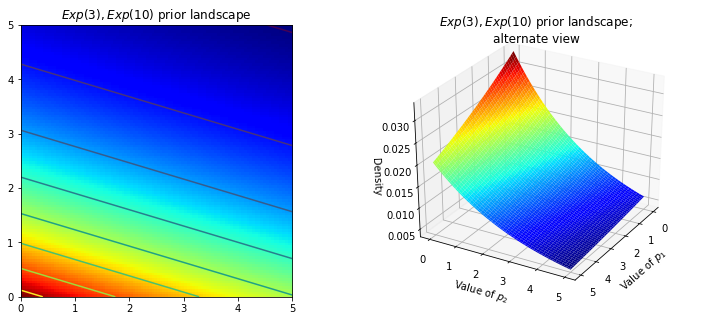

In [20]:
figsize(12.5, 5)
fig = plt.figure()
plt.subplot(121)

exp_x = stats.expon.pdf(x, scale=3)
exp_y = stats.expon.pdf(x, scale=10)
M = np.dot(exp_x[:, None], exp_y[None, :])
CS = plt.contour(X, Y, M)
im = plt.imshow(M, interpolation='none', origin='lower',
                cmap=jet, extent=(0, 5, 0, 5))
#plt.xlabel("prior on $p_1$")
#plt.ylabel("prior on $p_2$")
plt.title("$Exp(3), Exp(10)$ prior landscape") #上から見た図

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M, cmap=jet)
ax.view_init(azim=390)
ax.set_xlabel('Value of $p_1$') #p_1 の値
ax.set_ylabel('Value of $p_2$') #p_2 の値
ax.set_zlabel('Density') #密度
plt.title("$Exp(3), Exp(10)$ prior landscape; \nalternate view"); #斜めから見た図

In [21]:
# 観測データの生成

# 観測データのサンプルサイズ
N = 1

# 真のパラメータ
lambda_1_true = 1
lambda_2_true = 3

# 2つのパラメータからデータを生成
data = np.concatenate([
    stats.poisson.rvs(lambda_1_true, size=(N, 1)),
    stats.poisson.rvs(lambda_2_true, size=(N, 1))
], axis=1)
print("observed (2-dimensional,sample size = %d):" % N, data)

# プロット
x = y = np.linspace(.01, 5, 100)
likelihood_x = np.array([stats.poisson.pmf(data[:, 0], _x)
                        for _x in x]).prod(axis=1)
likelihood_y = np.array([stats.poisson.pmf(data[:, 1], _y)
                        for _y in y]).prod(axis=1)
L = np.dot(likelihood_x[:, None], likelihood_y[None, :]) # 尤度


observed (2-dimensional,sample size = 1): [[2 2]]


(0, 5)

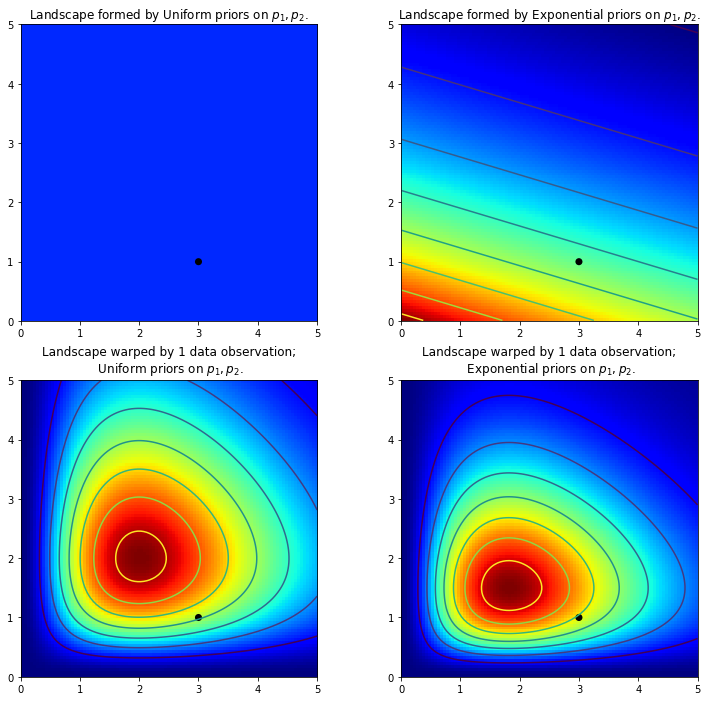

In [22]:
figsize(12.5, 12)

plt.subplot(221)
uni_x = stats.uniform.pdf(x, loc=0, scale=5)
uni_y = stats.uniform.pdf(x, loc=0, scale=5)
M = np.dot(uni_x[:, None], uni_y[None, :]) # 一様事前分布
im = plt.imshow(M, interpolation='none', origin='lower',
                cmap=jet, vmax=1, vmin=-.15, extent=(0, 5, 0, 5))
plt.scatter(lambda_2_true, lambda_1_true, c="k", s=50, edgecolor="none")
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title("Landscape formed by Uniform priors on $p_1, p_2$.") # 一様事前分布

plt.subplot(223)
plt.contour(x, y, M * L)
im = plt.imshow(M * L, interpolation='none', origin='lower',
                cmap=jet, extent=(0, 5, 0, 5))
plt.title("Landscape warped by %d data observation;\n Uniform priors on $p_1, p_2$." % N) # 一様事前分布に対する事後分布
plt.scatter(lambda_2_true, lambda_1_true, c="k", s=50, edgecolor="none")
plt.xlim(0, 5)
plt.ylim(0, 5)

plt.subplot(222)
exp_x = stats.expon.pdf(x, loc=0, scale=3)
exp_y = stats.expon.pdf(x, loc=0, scale=10)
M = np.dot(exp_x[:, None], exp_y[None, :]) # 指数事前分布

plt.contour(x, y, M)
im = plt.imshow(M, interpolation='none', origin='lower',
                cmap=jet, extent=(0, 5, 0, 5))
plt.scatter(lambda_2_true, lambda_1_true, c="k", s=50, edgecolor="none")
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title("Landscape formed by Exponential priors on $p_1, p_2$.") # 指数事前分布

plt.subplot(224)
plt.contour(x, y, M * L)
im = plt.imshow(M * L, interpolation='none', origin='lower',
                cmap=jet, extent=(0, 5, 0, 5))

plt.scatter(lambda_2_true, lambda_1_true, c="k", s=50, edgecolor="none")
plt.title("Landscape warped by %d data observation;\n Exponential priors on \
$p_1, p_2$." % N) # 指数事前分布に対する事後分布
plt.xlim(0, 5)
plt.ylim(0, 5)


[ 115.85679142  152.26153716  178.87449059  162.93500815  107.02820697
  105.19141146  118.38288501  125.3769803   102.88054011  206.71326136] ...


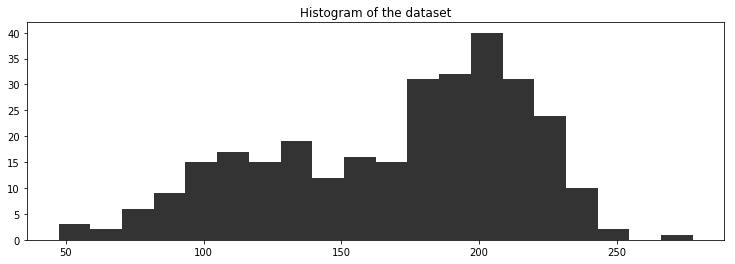

In [23]:
from os import makedirs
makedirs("data", exist_ok=True)

from urllib.request import urlretrieve
urlretrieve("https://git.io/vXt6b", "data/mixture_data.csv")


figsize(12.5, 4)
data = np.loadtxt("data/mixture_data.csv", delimiter=",")

plt.hist(data, bins=20, color="k", histtype="stepfilled", alpha=0.8)
plt.title("Histogram of the dataset")
plt.ylim([0, None])
print(data[:10], "...")

In [24]:
import pymc as pm

p = pm.Uniform("p", 0., 1.)

assignment = pm.Categorical("assignment", [p, 1 - p], size=data.shape[0])
print("prior assignment, with p = %.2f:" % p.value) # 事前確率 p でのクラスタの割当
print(assignment.value[:10], "...")


prior assignment, with p = 0.98:
[0 0 0 0 0 0 0 0 0 0] ...


In [25]:
taus = 1.0 / pm.Uniform("stds", 0, 33, size=2) ** 2 # std は標準偏差
centers = pm.Normal("centers", [120, 190], [0.01, 0.01], size=2)

# 以下の deterministic 関数は, 01 のクラスタの割当を taus と centors にマップする

@pm.deterministic
def center_i(assignment=assignment, centers=centers):
    return centers[assignment]

@pm.deterministic
def tau_i(assignment=assignment, taus=taus):
    return taus[assignment]

print("Random assignments: ", assignment.value[:4], "...") # ランダムな割当
print("Assigned center: ", center_i.value[:4], "...") # 割り当てられた中心
print("Assigned precision: ", tau_i.value[:4], "...") # 割り当てられた精度


Random assignments:  [0 0 0 0] ...
Assigned center:  [ 105.37535855  105.37535855  105.37535855  105.37535855] ...
Assigned precision:  [ 0.00187343  0.00187343  0.00187343  0.00187343] ...


In [26]:
# このモデルに観測を結びつける
observations = pm.Normal("obs", center_i, tau_i, value=data, observed=True)

# 新しい Model クラスのオブジェクトを作成する
model = pm.Model([p, assignment, observations, taus, centers])


In [27]:
mcmc = pm.MCMC(model)
mcmc.sample(50000)


 [-----------------100%-----------------] 50000 of 50000 complete in 23.8 sec

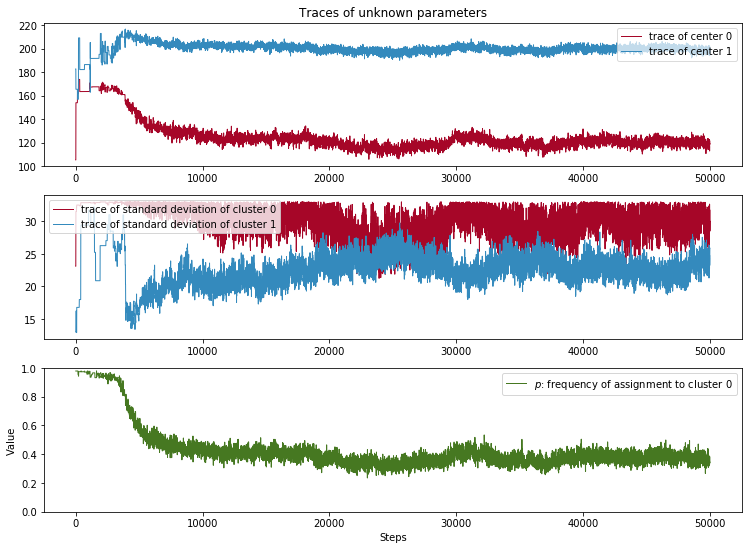

In [28]:
figsize(12.5, 9)
plt.subplot(311)
lw = 1
center_trace = mcmc.trace("centers")[:]

# 色の設定
colors = ["#348ABD", "#A60628"] \
if center_trace[-1, 0] > center_trace[-1, 1] \
    else ["#A60628", "#348ABD"]

plt.plot(center_trace[:, 0], label="trace of center 0", c=colors[0], lw=lw) # クラスタ 0 の中心の軌跡
plt.plot(center_trace[:, 1], label="trace of center 1", c=colors[1], lw=lw) # クラスタ 1 の中心の軌跡
plt.title("Traces of unknown parameters") # 未知のパラメータの軌跡
leg = plt.legend(loc="upper right")
leg.get_frame().set_alpha(0.7)

plt.subplot(312)
std_trace = mcmc.trace("stds")[:]
plt.plot(std_trace[:, 0], label="trace of standard deviation of cluster 0", # クラスタ 0 の標準偏差の軌跡
     c=colors[0], lw=lw)
plt.plot(std_trace[:, 1], label="trace of standard deviation of cluster 1", # クラスタ 1 の標準偏差の軌跡
     c=colors[1], lw=lw)
plt.legend(loc="upper left")

plt.subplot(313)
p_trace = mcmc.trace("p")[:]
plt.plot(p_trace, label="$p$: frequency of assignment to cluster 0", # クラスタ 0 への割当頻度 p
     color="#467821", lw=lw)
plt.xlabel("Steps") # ステップ数
plt.ylabel("Value") # 値
plt.ylim(0, 1)
plt.legend()


In [29]:
mcmc.sample(100000)

 [-----------------100%-----------------] 100000 of 100000 complete in 42.8 sec

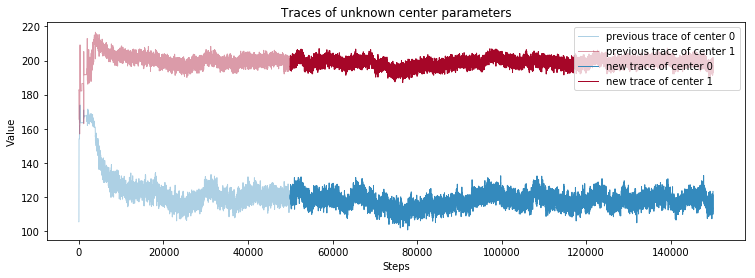

In [30]:
figsize(12.5, 4)
center_trace = mcmc.trace("centers", chain=1)[:]
prev_center_trace = mcmc.trace("centers", chain=0)[:]

x = np.arange(50000)
plt.plot(x, prev_center_trace[:, 0], label="previous trace of center 0", # クラスタ 0 の最初の軌跡
     lw=lw, alpha=0.4, c=colors[1])
plt.plot(x, prev_center_trace[:, 1], label="previous trace of center 1", # クラスタ 1 の最初の軌跡
     lw=lw, alpha=0.4, c=colors[0])

x = np.arange(50000, 150000)
plt.plot(x, center_trace[:, 0], label="new trace of center 0", lw=lw, c="#348ABD") # クラスタ 0 の中心の新しい軌跡
plt.plot(x, center_trace[:, 1], label="new trace of center 1", lw=lw, c="#A60628") # クラスタ 1 の中心の新しい軌跡

plt.title("Traces of unknown center parameters")
leg = plt.legend(loc="upper right")
leg.get_frame().set_alpha(0.8)
plt.xlabel("Steps");
plt.ylabel("Value");


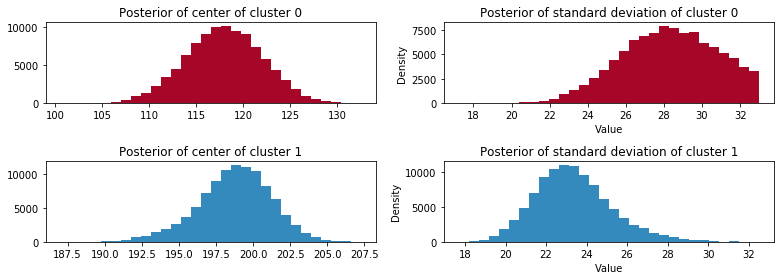

In [31]:
figsize(11.0, 4)
std_trace = mcmc.trace("stds")[:]

_i = [1, 2, 3, 4]
for i in range(2):
    plt.subplot(2, 2, _i[2 * i])
    plt.title("Posterior of center of cluster %d" % i) # クラスタ中心の事後分布
    plt.hist(center_trace[:, i], color=colors[i], bins=30,
             histtype="stepfilled")

    plt.subplot(2, 2, _i[2 * i + 1])
    plt.title("Posterior of standard deviation of cluster %d" % i) # クラスタ標準偏差の事後分布
    plt.hist(std_trace[:, i], color=colors[i], bins=30,
             histtype="stepfilled")
    plt.ylabel('Density')
    plt.xlabel('Value')
    # plt.autoscale(tight=True)

plt.tight_layout()


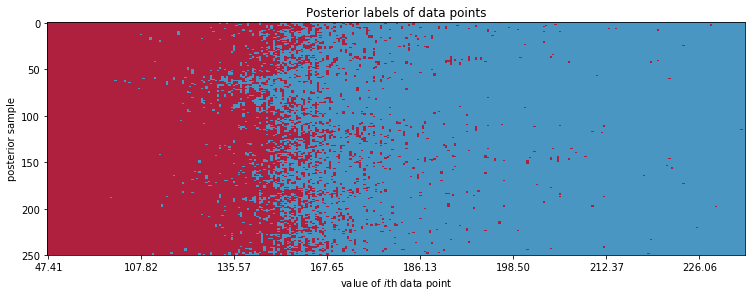

In [32]:
import matplotlib as mpl
figsize(12.5, 4.5)
plt.cmap = mpl.colors.ListedColormap(colors)
plt.imshow(mcmc.trace("assignment")[::400, np.argsort(data)],
       cmap=plt.cmap, aspect=.4, alpha=.9)
plt.xticks(np.arange(0, data.shape[0], 40),
       ["%.2f" % s for s in np.sort(data)[::40]])
plt.ylabel("posterior sample") # 事後ラベル
plt.xlabel("value of $i$th data point") # データ点の値
plt.title("Posterior labels of data points");


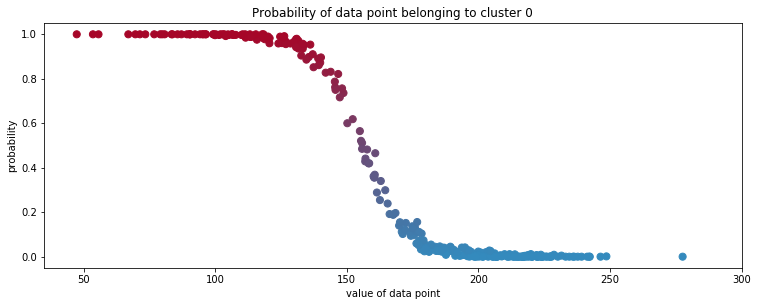

In [33]:
cmap = mpl.colors.LinearSegmentedColormap.from_list("BMH", colors)
assign_trace = mcmc.trace("assignment")[:]
plt.scatter(data, 1 - assign_trace.mean(axis=0), cmap=cmap,
        c=assign_trace.mean(axis=0), s=50)
plt.ylim(-0.05, 1.05)
plt.xlim(35, 300)
plt.title("Probability of data point belonging to cluster 0")
plt.ylabel("probability") # 確率
plt.xlabel("value of data point") # データ点の値


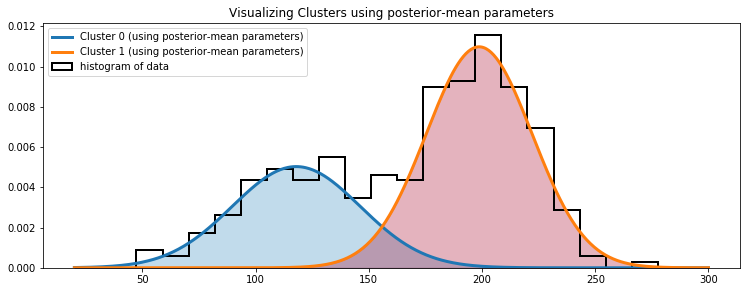

In [34]:
norm = stats.norm
x = np.linspace(20, 300, 500)
posterior_center_means = center_trace.mean(axis=0)
posterior_std_means = std_trace.mean(axis=0)
posterior_p_mean = mcmc.trace("p")[:].mean()

plt.hist(data, bins=20, histtype="step", normed=True, color="k",
     lw=2, label="histogram of data") # データのヒストグラム
y = posterior_p_mean * norm.pdf(x, loc=posterior_center_means[0],
                                scale=posterior_std_means[0])
plt.plot(x, y, label="Cluster 0 (using posterior-mean parameters)", lw=3) # クラスタ 0 (事後平均)
plt.fill_between(x, y, color=colors[1], alpha=0.3)

y = (1 - posterior_p_mean) * norm.pdf(x, loc=posterior_center_means[1],
                                      scale=posterior_std_means[1])
plt.plot(x, y, label="Cluster 1 (using posterior-mean parameters)", lw=3) # クラスタ 1 (事後平均)
plt.fill_between(x, y, color=colors[0], alpha=0.3)

plt.legend(loc="upper left")
plt.title("Visualizing Clusters using posterior-mean parameters");


 [-----------------100%-----------------] 500 of 500 complete in 0.0 sec

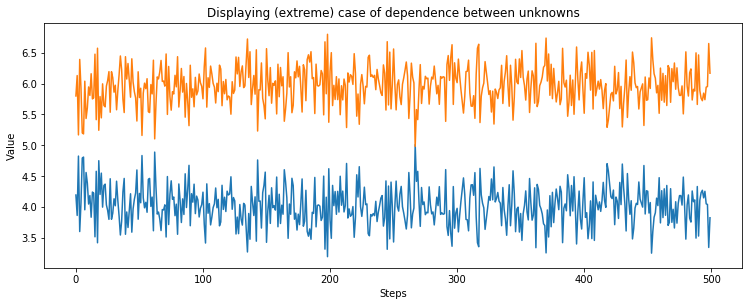

In [35]:
import pymc as pm

x = pm.Normal("x", 4, 10)
y = pm.Lambda("y", lambda x=x: 10 - x, trace=True)

ex_mcmc = pm.MCMC(pm.Model([x, y]))
ex_mcmc.sample(500)

plt.plot(ex_mcmc.trace("x")[:])
plt.plot(ex_mcmc.trace("y")[:])
plt.xlabel('Steps')
plt.ylabel('Value')
plt.title("Displaying (extreme) case of dependence between unknowns");


In [36]:
norm_pdf = stats.norm.pdf
p_trace = mcmc.trace("p")[:]
x = 175

v = p_trace * norm_pdf(x, loc=center_trace[:, 0], scale=std_trace[:, 0]) > \
    (1 - p_trace) * norm_pdf(x, loc=center_trace[:, 1], scale=std_trace[:, 1])

print("Probability of belonging to cluster 1:", v.mean())


Probability of belonging to cluster 1: 0.0
